# Compare Ronchi grating  and Hologram


- author : Sylvie Dagoret-Campagne
- affiliation : LAL
- date March 10th 2017


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Constants for conversions

In [3]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [4]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [5]:
deg_to_rad=np.pi/180.

In [6]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [7]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [8]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [9]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [10]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [11]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

### Path input files

In [12]:
path_ronchi="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/OpticSimWthB4/Ronchi/R200"
path_holo="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/OpticSimWthB4/MyHOLO/Ana_2017_March_07"

### List of orders

In [13]:
orders=["O0","OP1","OM1","OP2","OM2"]
order_str=["0","+1","-1","+2","-2"]

In [14]:
NB_ORDERS=len(orders)

### Angle of incidences

In [15]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

## Few functions

In [16]:
def BuildInputFilename(NBTOT,theta_x_num,theta_y_num,order):
    rayfile="Beam4_Rayfile_{:d}_allwl_{:d}_{:d}_{}.xlsx".format(NBTOT,theta_x_num,theta_y_num,order)
    return rayfile

In [17]:
def BuildInputFullFilename(path,thefile):
    return os.path.join(path,thefile)

In [18]:
def ReadExcelFile(rayfile):
    input = pd.ExcelFile(rayfile)
    sheet_name=input.sheet_names[0]
    #df_colname = input.parse(sheet_name,index_row=0,header=1,usecols=range(0,14))
    #df_colname.head()
    df = input.parse(sheet_name,index_row=0,header=2,usecols=range(0,13))
    #df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","col","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
    df.columns = ["X0","Y0","Z0","U0","V0","W0","wave","WFE","Xgoal","Ygoal","Xfinal","Yfinal","Notes"]
    return df

## Read excel files

In [19]:
all_df_ronchi = []
all_df_holo = []

for order in orders:
    inputfilename=BuildInputFilename(NBTOT,theta_x_num,theta_y_num,order)
    ronchi_filename=BuildInputFullFilename(path_ronchi,inputfilename)
    holo_filename=BuildInputFullFilename(path_holo,inputfilename)
    df_ronchi=ReadExcelFile(ronchi_filename)
    df_holo=ReadExcelFile(holo_filename)
    df_ronchi.head()
    df_holo.head()
    all_df_ronchi.append(df_ronchi)
    all_df_holo.append(df_holo)

### Decoding datasets

In [20]:
all_wavelength=np.array([0.0004,0.0006,0.0008,0.001])

In [21]:
NB_WL=all_wavelength.shape[0]

In [22]:
idy=-1
XAV_array=np.zeros((NB_ORDERS,NB_WL))
YAV_array=np.zeros((NB_ORDERS,NB_WL))
XSTD_array=np.zeros((NB_ORDERS,NB_WL))
YSTD_array=np.zeros((NB_ORDERS,NB_WL))
for order in orders:
    idy+=1
    df=all_df_ronchi[idy]
    wave=df["wave"]
    Xfinal=df["Xfinal"]
    Yfinal=df["Yfinal"]
    idx=-1
    for wavelength in all_wavelength:
        idx+=1
        selected_indexes=np.where(wave==wavelength)
        x=Xfinal[selected_indexes[0]]
        y=Yfinal[selected_indexes[0]]
        xav=np.average(x)
        yav=np.average(y)
        xrms=np.std(x)
        yrms=np.std(y)
        XAV_array[idy,idx]=xav
        YAV_array[idy,idx]=yav
        XSTD_array[idy,idx]=xrms
        YSTD_array[idy,idx]=yrms
        
        

In [23]:
def DecodeDataset(all_df):
    idy=-1
    XAV_array=np.zeros((NB_ORDERS,NB_WL))
    YAV_array=np.zeros((NB_ORDERS,NB_WL))
    XSTD_array=np.zeros((NB_ORDERS,NB_WL))
    YSTD_array=np.zeros((NB_ORDERS,NB_WL))
    XMIN_array=np.zeros((NB_ORDERS,NB_WL))
    YMIN_array=np.zeros((NB_ORDERS,NB_WL))
    XMAX_array=np.zeros((NB_ORDERS,NB_WL))
    YMAX_array=np.zeros((NB_ORDERS,NB_WL))
    DELTX_array=np.zeros((NB_ORDERS,NB_WL))
    DELTY_array=np.zeros((NB_ORDERS,NB_WL))
    for order in orders:
        idy+=1
        df=all_df[idy]
        wave=df["wave"]
        Xfinal=df["Xfinal"]
        Yfinal=df["Yfinal"]
        idx=-1
        for wavelength in all_wavelength:
            idx+=1
            selected_indexes=np.where(wave==wavelength)
            x=Xfinal[selected_indexes[0]]
            y=Yfinal[selected_indexes[0]]
            xav=np.average(x)
            yav=np.average(y)
            xrms=np.std(x)
            yrms=np.std(y)
            xmin=np.min(x)
            xmax=np.max(x)
            ymin=np.min(y)
            ymax=np.max(y)
            
            XAV_array[idy,idx]=xav
            YAV_array[idy,idx]=yav
            XSTD_array[idy,idx]=xrms
            YSTD_array[idy,idx]=yrms
            XMIN_array[idy,idx]=xmin
            YMIN_array[idy,idx]=ymin
            XMAX_array[idy,idx]=xmax
            YMAX_array[idy,idx]=ymax
            DELTX_array[idy,idx]=xmax-xmin
            DELTY_array[idy,idx]=ymax-ymin
    
    return XAV_array,YAV_array,XSTD_array,YSTD_array,XMIN_array,XMAX_array,YMIN_array,YMAX_array,DELTX_array,DELTY_array

In [24]:
XAV_ronchi,YAV_ronchi,XSTD_ronchi,YSTD_ronchi,XMIN_ronchi,Xmax_ronchi,YMIN_ronchi,Ymax_ronchi,DELTX_ronchi,DELTY_ronchi=DecodeDataset(all_df_ronchi)

In [25]:
XAV_holo,YAV_holo,XSTD_holo,YSTD_holo,XMIN_holo,Xmax_holo,YMIN_holo,Ymax_holo,DELTX_holo,DELTY_holo=DecodeDataset(all_df_holo)

In [26]:
print XAV_ronchi

[[  2.24008713e-22   2.24008713e-22   2.24008713e-22   2.24008713e-22]
 [  4.57764135e+00   6.89432362e+00   9.24520866e+00   1.16430269e+01]
 [ -4.57764135e+00  -6.89432362e+00  -9.24520866e+00  -1.16430269e+01]
 [  9.24520866e+00   1.41017499e+01   1.92668211e+01   2.48974800e+01]
 [ -9.24520866e+00  -1.41017499e+01  -1.92668211e+01  -2.48974800e+01]]


## Plot dispersion

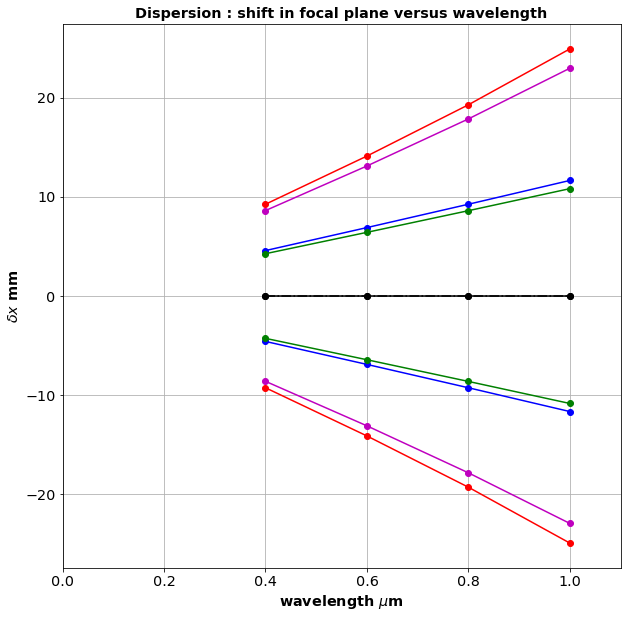

In [27]:
plt.plot(all_wavelength*1000,XAV_ronchi[0,:],'ko-')
plt.plot(all_wavelength*1000,XAV_ronchi[1,:],'bo-')
plt.plot(all_wavelength*1000,XAV_ronchi[2,:],'bo-')
plt.plot(all_wavelength*1000,XAV_ronchi[3,:],'ro-')
plt.plot(all_wavelength*1000,XAV_ronchi[4,:],'ro-')
plt.plot(all_wavelength*1000,YAV_holo[0,:],'ko-.')
plt.plot(all_wavelength*1000,YAV_holo[1,:],'go-')
plt.plot(all_wavelength*1000,YAV_holo[2,:],'go-')
plt.plot(all_wavelength*1000,YAV_holo[3,:],'mo-')
plt.plot(all_wavelength*1000,YAV_holo[4,:],'mo-')
plt.xlim(0,1.1)
plt.title("Dispersion : shift in focal plane versus wavelength",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\delta x$ mm",fontweight='bold')
plt.grid()
plt.savefig('DISP_RonchiHolo.jpg')

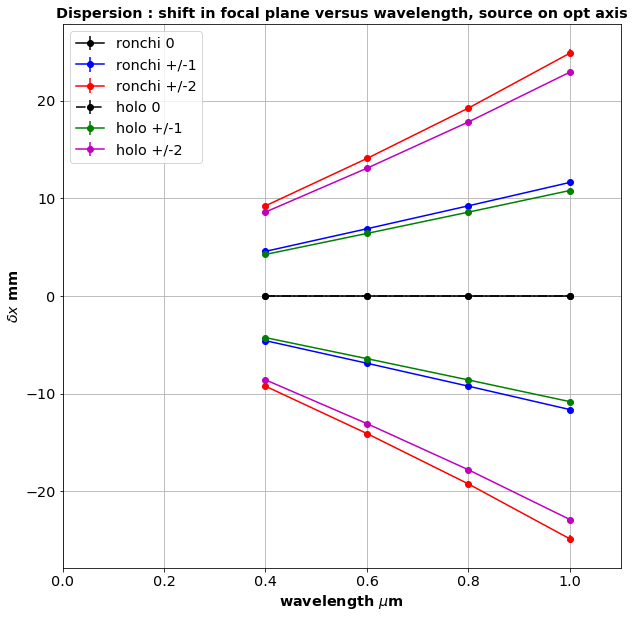

In [28]:
plt.errorbar(all_wavelength*1000,XAV_ronchi[0,:],yerr=DELTX_ronchi[0,:]/2.,fmt='ko-',label='ronchi 0')
plt.errorbar(all_wavelength*1000,XAV_ronchi[1,:],yerr=DELTX_ronchi[1,:]/2.,fmt='bo-',label='ronchi +/-1')
plt.errorbar(all_wavelength*1000,XAV_ronchi[2,:],yerr=DELTX_ronchi[2,:]/2.,fmt='bo-')
plt.errorbar(all_wavelength*1000,XAV_ronchi[3,:],yerr=DELTX_ronchi[3,:]/2.,fmt='ro-',label='ronchi +/-2')
plt.errorbar(all_wavelength*1000,XAV_ronchi[4,:],yerr=DELTX_ronchi[4,:]/2.,fmt='ro-')
plt.errorbar(all_wavelength*1000,YAV_holo[0,:],yerr=DELTX_holo[0,:]/2., fmt='ko-.',label='holo 0' )
plt.errorbar(all_wavelength*1000,YAV_holo[1,:],yerr=DELTX_holo[1,:]/2.,fmt='go-',label='holo +/-1')
plt.errorbar(all_wavelength*1000,YAV_holo[2,:],yerr=DELTX_holo[2,:]/2.,fmt='go-')
plt.errorbar(all_wavelength*1000,YAV_holo[3,:],yerr=DELTX_holo[3,:]/2.,fmt='mo-',label='holo +/-2')
plt.errorbar(all_wavelength*1000,YAV_holo[4,:],yerr=DELTX_holo[4,:]/2.,fmt='mo-')

plt.xlim(0,1.1)
plt.title("Dispersion : shift in focal plane versus wavelength, source on opt axis",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\delta x$ mm",fontweight='bold')
plt.grid()
plt.legend(loc='best')
plt.savefig('DISP_RonchiHolo_err.jpg')

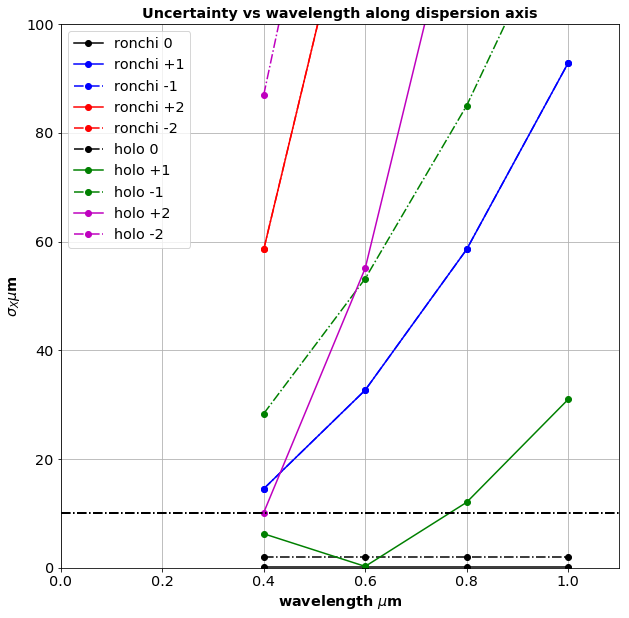

In [29]:
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[0,:]/2.,'ko-',label='ronchi 0')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[1,:]/2.,'bo-',label='ronchi +1')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[2,:]/2.,'bo-.',label='ronchi -1')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[3,:]/2.,'ro-',label='ronchi +2')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[4,:]/2.,'ro-.',label='ronchi -2')
plt.plot(all_wavelength*1000,1000*DELTY_holo[0,:]/2.,'ko-.',label='holo 0' )
plt.plot(all_wavelength*1000,1000*DELTY_holo[1,:]/2.,'go-',label='holo +1')
plt.plot(all_wavelength*1000,1000*DELTY_holo[2,:]/2.,'go-.',label='holo -1')
plt.plot(all_wavelength*1000,1000*DELTY_holo[3,:]/2.,'mo-',label='holo +2')
plt.plot(all_wavelength*1000,1000*DELTY_holo[4,:]/2.,'mo-.',label='holo -2')
plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.ylim(0.,100.)
plt.title("Uncertainty vs wavelength along dispersion axis",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\sigma_X \mu$m",fontweight='bold')
plt.grid()
plt.legend(loc='best')
plt.savefig('RESOX_RonchiHolo.jpg')

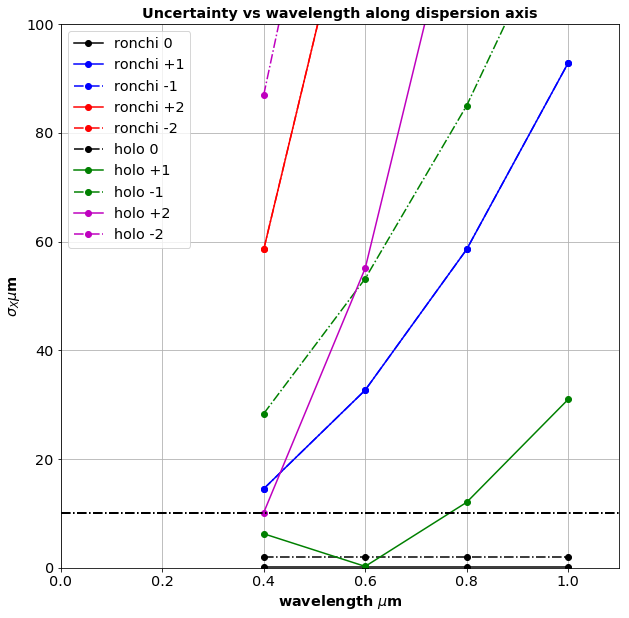

In [30]:
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[0,:]/2.,'ko-',label='ronchi 0')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[1,:]/2.,'bo-',label='ronchi +1')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[2,:]/2.,'bo-.',label='ronchi -1')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[3,:]/2.,'ro-',label='ronchi +2')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[4,:]/2.,'ro-.',label='ronchi -2')
plt.plot(all_wavelength*1000,1000*DELTY_holo[0,:]/2.,'ko-.',label='holo 0' )
plt.plot(all_wavelength*1000,1000*DELTY_holo[1,:]/2.,'go-',label='holo +1')
plt.plot(all_wavelength*1000,1000*DELTY_holo[2,:]/2.,'go-.',label='holo -1')
plt.plot(all_wavelength*1000,1000*DELTY_holo[3,:]/2.,'mo-',label='holo +2')
plt.plot(all_wavelength*1000,1000*DELTY_holo[4,:]/2.,'mo-.',label='holo -2')

plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.ylim(0,100.)
plt.title("Uncertainty vs wavelength along dispersion axis",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\sigma_X \mu$m",fontweight='bold')
plt.grid()
plt.legend(loc='best')

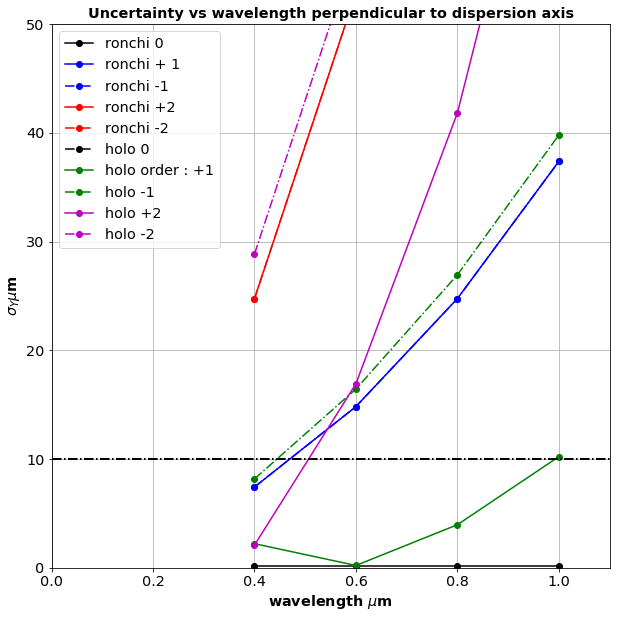

In [34]:
plt.plot(all_wavelength*1000,1000*DELTY_ronchi[0,:]/2.,'ko-',label='ronchi 0')
plt.plot(all_wavelength*1000,1000*DELTY_ronchi[1,:]/2.,'bo-',label='ronchi + 1')
plt.plot(all_wavelength*1000,1000*DELTY_ronchi[2,:]/2.,'bo-.',label='ronchi -1')
plt.plot(all_wavelength*1000,1000*DELTY_ronchi[3,:]/2.,'ro-',label='ronchi +2')
plt.plot(all_wavelength*1000,1000*DELTY_ronchi[4,:]/2.,'ro-.',label='ronchi -2')
plt.plot(all_wavelength*1000,1000*DELTX_holo[0,:]/2.,'ko-.',label='holo 0' )
plt.plot(all_wavelength*1000,1000*DELTX_holo[1,:]/2.,'go-',label='holo order : +1')
plt.plot(all_wavelength*1000,1000*DELTX_holo[2,:]/2.,'go-.',label='holo -1')
plt.plot(all_wavelength*1000,1000*DELTX_holo[3,:]/2.,'mo-',label='holo +2')
plt.plot(all_wavelength*1000,1000*DELTX_holo[4,:]/2.,'mo-.',label='holo -2')

plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.ylim(0,50.)
plt.title("Uncertainty vs wavelength perpendicular to dispersion axis",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\sigma_Y \mu$m",fontweight='bold')
plt.grid()
plt.legend(loc='best')
plt.savefig('RESOY_RonchiHolo.jpg')

## For P2IO


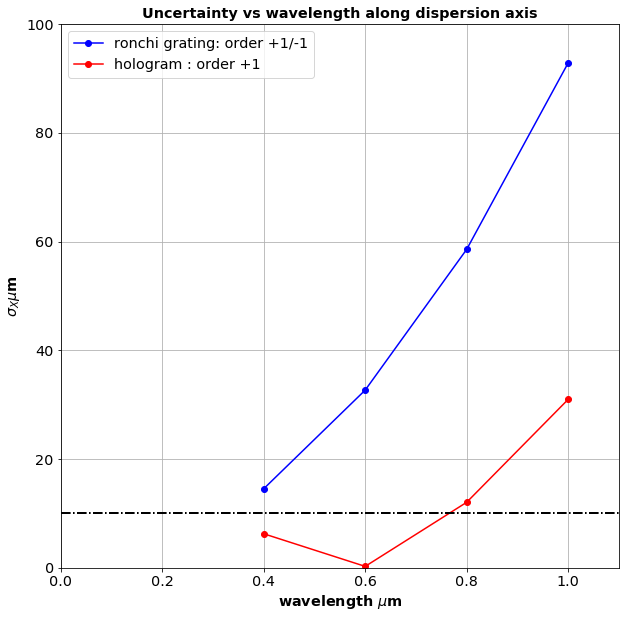

In [37]:
#plt.plot(all_wavelength*1000,1000*DELTX_ronchi[0,:]/2.,'ko-',label='ronchi 0')
plt.plot(all_wavelength*1000,1000*DELTX_ronchi[1,:]/2.,'bo-',label='ronchi grating: order +1/-1')
#plt.plot(all_wavelength*1000,1000*DELTX_ronchi[2,:]/2.,'bo-.',label='ronchi -1')
#plt.plot(all_wavelength*1000,1000*DELTX_ronchi[3,:]/2.,'ro-',label='ronchi +2')
#plt.plot(all_wavelength*1000,1000*DELTX_ronchi[4,:]/2.,'ro-.',label='ronchi -2')
#plt.plot(all_wavelength*1000,1000*DELTY_holo[0,:]/2.,'ko-.',label='holo 0' )
plt.plot(all_wavelength*1000,1000*DELTY_holo[1,:]/2.,'ro-',label='hologram : order +1')
#plt.plot(all_wavelength*1000,1000*DELTY_holo[2,:]/2.,'go-.',label='holo -1')
#plt.plot(all_wavelength*1000,1000*DELTY_holo[3,:]/2.,'mo-',label='holo +2')
#plt.plot(all_wavelength*1000,1000*DELTY_holo[4,:]/2.,'mo-.',label='holo -2')
plt.plot([0.,1.1],[10.,10.],'k-.',lw=2)
plt.xlim(0,1.1)
plt.ylim(0.,100.)
plt.title("Uncertainty vs wavelength along dispersion axis",fontweight='bold')
plt.xlabel("wavelength $\mu$m",fontweight='bold')
plt.ylabel("$\sigma_X \mu$m",fontweight='bold')
plt.grid()
plt.legend(loc='best')
plt.savefig('RESOX_RonchiHolo_P2IO.jpg')